Chapter 18

# 核主成分分析
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# 装饰
import matplotlib.pyplot as plt
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

## 生成数据

In [3]:
X_original, y = make_circles(n_samples=200, 
                             factor=0.3, 
                             noise=0.05, 
                             random_state=0)

In [4]:
X_original.shape

(200, 2)

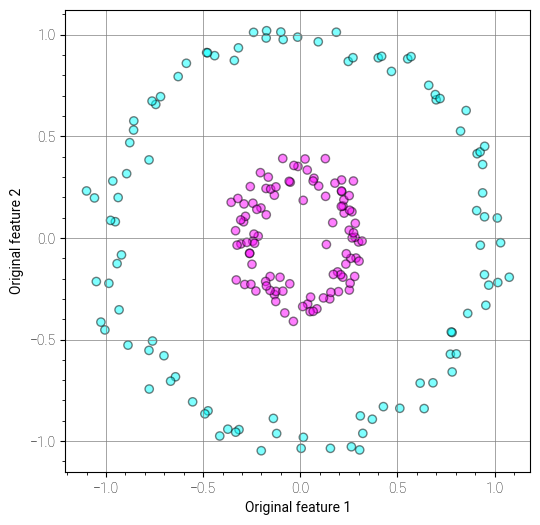

In [27]:
fig, ax = plt.subplots(figsize = (6,6))

ax.scatter(X_original[:, 0], X_original[:, 1], 
           c=y, cmap = 'cool', 
           edgecolors = ['k'], alpha = 0.5)
ax.set_xlabel("Original feature 1")
ax.set_ylabel("Original feature 2")
# plt.savefig('原始数据.svg')

## 标准化

In [6]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X_original)

Text(0, 0.5, 'STD feature 2')

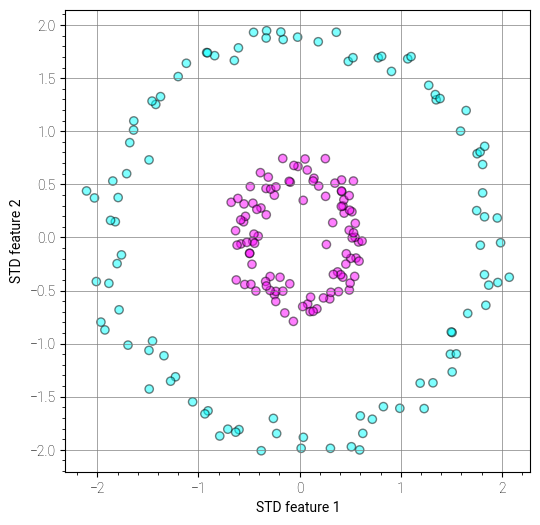

In [7]:
fig, ax = plt.subplots(figsize = (6,6))

ax.scatter(X[:, 0], X[:, 1], 
           c=y, cmap = 'cool', 
           edgecolors = ['k'], alpha = 0.5)
ax.set_xlabel("STD feature 1")
ax.set_ylabel("STD feature 2")

## 计算欧氏距离矩阵

In [8]:
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(X, X, squared=True)

<AxesSubplot:>

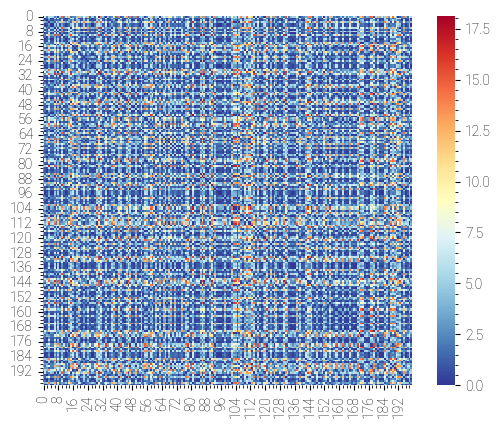

In [9]:
sns.heatmap(dist, square = True, cmap = 'RdYlBu_r')

In [10]:
dist.shape

(200, 200)

## 计算核矩阵

In [11]:
gamma = 1 # 模型参数需要优化
K = np.exp(-gamma * dist)

In [12]:
K.shape

(200, 200)

<AxesSubplot:>

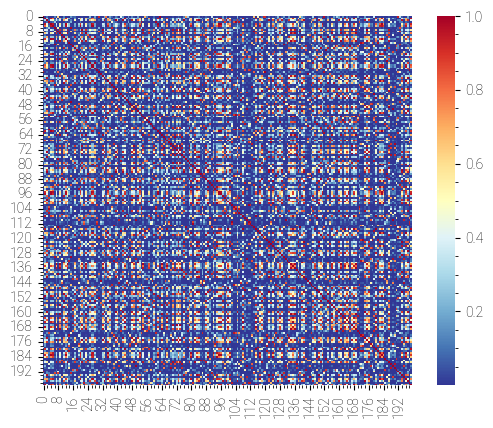

In [13]:
sns.heatmap(K, square = True, cmap = 'RdYlBu_r')

## 中心化

In [14]:
from sklearn.preprocessing import KernelCenterer
# Kc = KernelCenterer().fit_transform(K)

n = len(K)
M = (np.identity(n) - 1/n*np.ones((n,n)))
Kc = M @ K @ M.T

<AxesSubplot:>

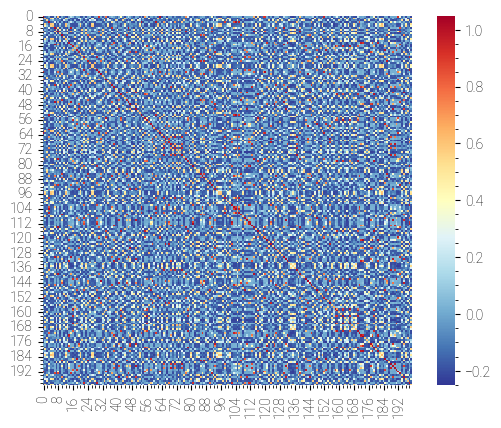

In [15]:
sns.heatmap(Kc, square = True, cmap = 'RdYlBu_r')

In [16]:
# Kc.mean(axis = 0)

In [17]:
# Kc.mean(axis = 1)

## 特征值分解

In [18]:
eig_vals, eig_vecs = np.linalg.eigh(Kc)
idx = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]

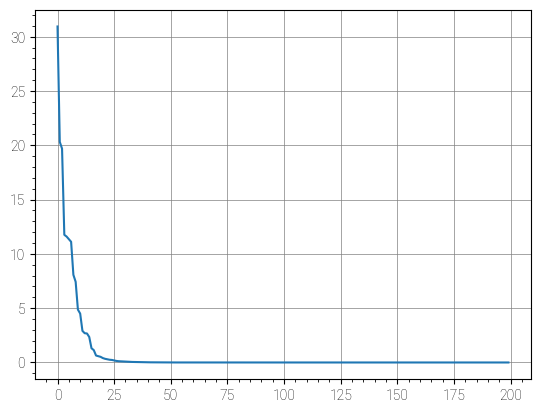

In [19]:
plt.plot(eig_vals)

## 取出前两个主成分

In [20]:
num_PCs = 2
Xpca = eig_vecs[:,:2]

In [25]:
eig_vals[:2]

array([30.94543088, 20.31503679])

In [21]:
Xpca.shape

(200, 2)

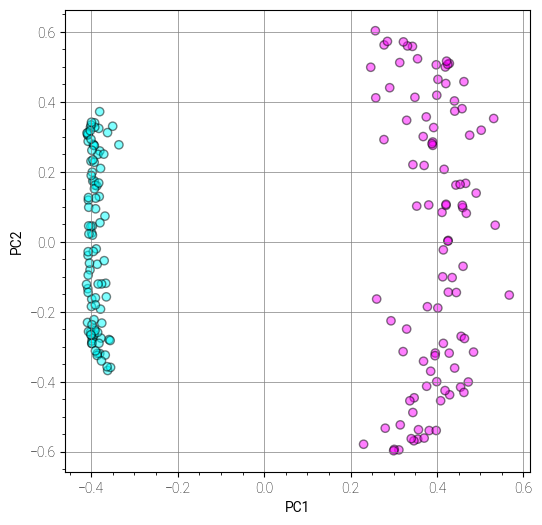

In [28]:
fig, ax = plt.subplots(figsize = (6,6))

ax.scatter(Xpca[:, 0] * np.sqrt(eig_vals[0]), Xpca[:, 1] * np.sqrt(eig_vals[1]), 
           c=y, cmap = 'cool', 
           edgecolors = ['k'], alpha = 0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
# plt.savefig('KPCA前两个因子得分.svg')

## 使用Scikit-Learn

In [23]:
from sklearn.decomposition import KernelPCA
SK_PCA = KernelPCA(n_components=2, kernel='rbf', gamma=1)
SK_PC_X = SK_PCA.fit_transform(X)

Text(0.5, 0, 'PC2')

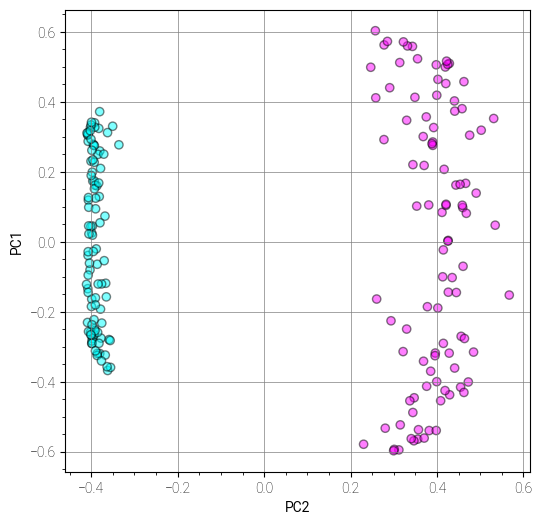

In [24]:
fig, ax = plt.subplots(figsize = (6,6))

ax.scatter(SK_PC_X[:, 0], SK_PC_X[:, 1], 
           c=y, cmap = 'cool', 
           edgecolors = ['k'], alpha = 0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")